In [1]:
! pip install statsmodels

In [2]:
! pip install pandas

In [3]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the Csv file from the file location dataset
df = pd.read_csv('Tesla.csv')

# Printing the over view of the raw data set
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6-29-2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6-30-2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,07-01-2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,07-02-2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,07-06-2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [5]:
df.shape

(19, 7)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

<Axes: >

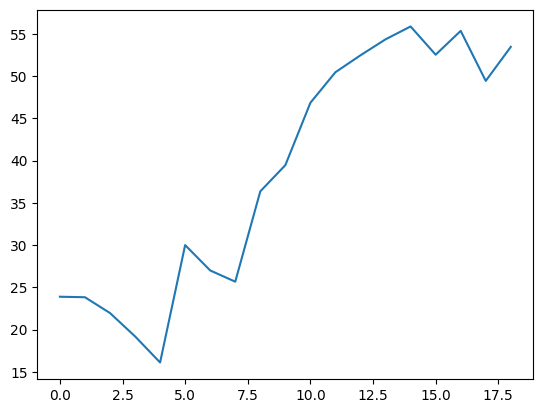

In [8]:
df['Close'].plot()

In [9]:
x = df[['Open', 'High', 'Low', 'Volume']].values # independent varibles
y = df['Close'].values # dependent variable

In [10]:
from sklearn.model_selection import train_test_split
# Splitting the data 80% train and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# Creating Regression model
regressor = LinearRegression()

#fit linear regression model
model = regressor.fit(x_train, y_train)

# Use model to make predictions
y_pred = regressor.predict(x_test)

In [12]:
# With the test predictions complete, the next step will better compare them
# with the actual output values for x_test by organizing them in a DataFrameformat:

predicted = regressor.predict(x_test)

dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

   Actual_Price  Predicted_Price
0         46.84        52.547628
1         23.83        28.098148
2         36.36        39.133880
3         53.46        39.548105


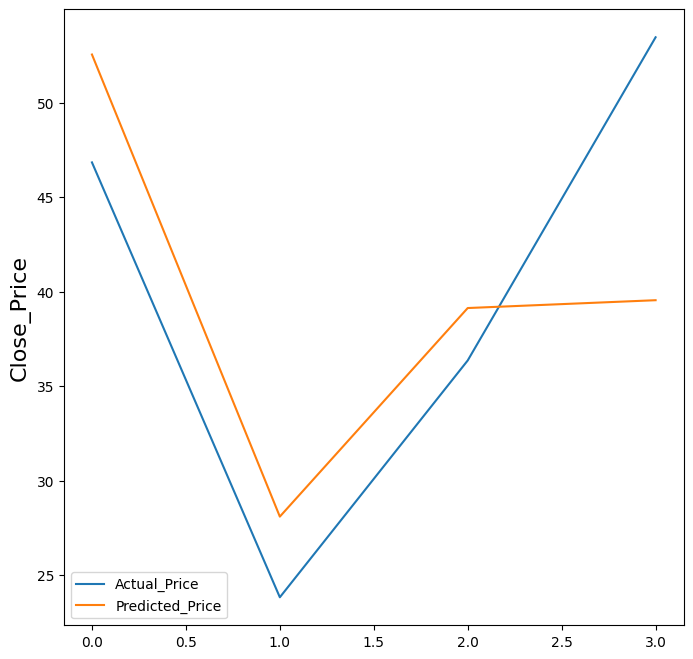

In [13]:
plt.figure(figsize=(8,8))
plt.ylabel('Close_Price', fontsize=16)
plt.plot(dfr)
plt.legend(['Actual_Price', 'Predicted_Price'])
plt.show()

<Axes: >

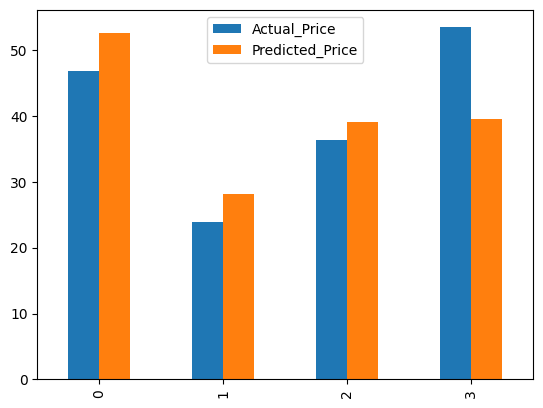

In [14]:
# garph first 5 values
graph = dfr.head(4)
graph.plot(kind='bar')